In [1]:
# Sepal Length, Sepal Width, Petal length and Petal Width.
#Setosa, Versicolor, and Virginica

In [13]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
df = datasets.load_iris()
x = df.data
x[:4]
# Sin variable Y por que no hay target 

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

In [6]:
x_train, x_test = train_test_split(x, test_size = 0.30, random_state = 0)

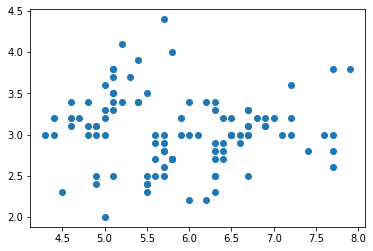

In [8]:
xs = x_train[:,0]
ys = x_train[:,1]
plt.scatter(xs,ys)

In [14]:
model = KMeans(n_clusters= 3) #Separa en cuantos grupos 
model.fit(x_train) #Entrenar modelo

KMeans(n_clusters=3)

In [15]:
predict = model.predict(x_train)
predict

array([0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0,
       2, 1, 1, 2, 0, 1, 1, 2, 1, 0, 0, 1, 0, 2, 0, 1, 2, 2, 2, 2, 1, 1,
       2, 2, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 1, 0, 2, 2, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 1, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 0, 2, 1])

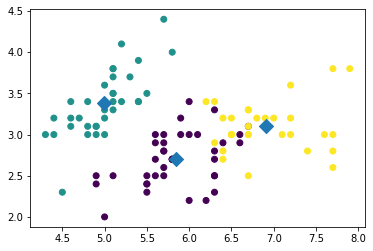

In [18]:
plt.scatter(xs,ys, c=predict) #Clasifica los colores segun la variable predict
centroids = model.cluster_centers_ #creacion de centroides

centroids_x =  centroids[:,0]
centroids_y = centroids[:,1]

plt.scatter(centroids_x, centroids_y, marker='D', s= 100)
plt.show()

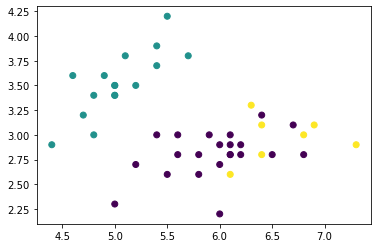

In [20]:
xs_ = x_test[:,0]
ys_ = x_test[:,1]
predict_test = model.predict(x_test)
plt.scatter(xs_,ys_, c=predict_test)

In [21]:
model.inertia_

58.219356146304655

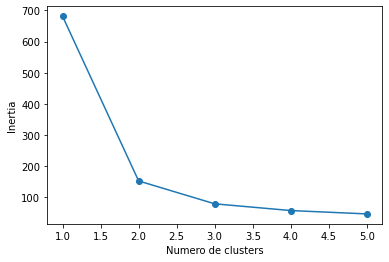

In [26]:
#Para escoger cuantos clusters
ks = range(1, 6)
inertias = []

for k in ks:
    #instanciar
    model = KMeans(n_clusters=k)
    #fit
    model.fit(x)
    inertias.append(model.inertia_)
plt.plot(ks,inertias, '-o')
plt.xlabel('Numero de clusters')
plt.ylabel('Inertia')
plt.show()

In [27]:
#Evaluar modelo con tabulacion cruzada

In [28]:
import pandas as pd

In [29]:
tipos = df.target
x = df.data

In [30]:
model = KMeans(n_clusters=3)
labels = model.fit_predict(x)

In [31]:
df = pd.DataFrame({'labels':labels, 'tipos':tipos})
cross_table = pd.crosstab(df['labels'], df['tipos'])
print(cross_table)

tipos    0   1   2
labels            
0       50   0   0
1        0   2  36
2        0  48  14
